<a href="https://colab.research.google.com/github/halim-jun/Ai_study/blob/master/20200811_Bike_Sharing_demand_ipnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 데이터 가져오기

In [ ]:
import seaborn as sns
import sklearn
import pandas as pd
import numpy as np
import sklearn.metrics
from sklearn.metrics import accuracy_score

from google.colab import files
files.upload()

In [42]:
train=pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#2. Datetime 자료형 변환

In [43]:
pd.to_datetime(train['datetime'])
train['year']=pd.DatetimeIndex(train['datetime']).year
train['month']=pd.DatetimeIndex(train['datetime']).month
train['day']=pd.DatetimeIndex(train['datetime']).day
train['hour']=pd.DatetimeIndex(train['datetime']).hour
train['minute']=pd.DatetimeIndex(train['datetime']).minute
train['second']=pd.DatetimeIndex(train['datetime']).second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


#3. year, month, day, hour, minute, second 데이터 개수 시각화

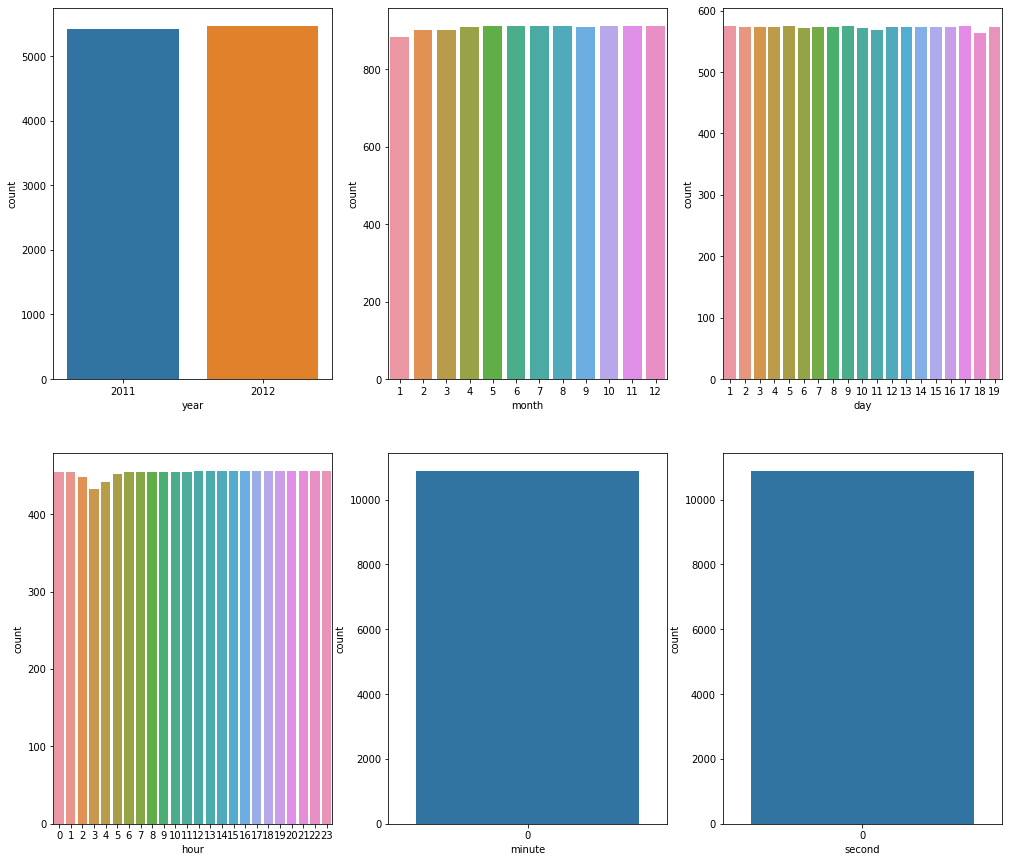

In [102]:
fig=plt.figure(figsize=(17,15))
ax1=fig.add_subplot(2,3,1)
sns.countplot(data=train, x=train['year'])
ax2=fig.add_subplot(2,3,2)
sns.countplot(data=train, x=train['month'])
ax2=fig.add_subplot(2,3,3)
sns.countplot(data=train, x=train['day'])
ax2=fig.add_subplot(2,3,4)
sns.countplot(data=train, x=train['hour'])
ax2=fig.add_subplot(2,3,5)
sns.countplot(data=train, x=train['minute'])
ax2=fig.add_subplot(2,3,6)
sns.countplot(data=train, x=train['second'])

# 4. X, y 컬럼 선택 및 train/test 데이터 분리
X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기   
count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [84]:
from sklearn.model_selection import train_test_split
y=train['count']
x=train.drop(['count','datetime', 'year', 'month','day','hour','minute','second', 'casual', 'registered'], axis=1)

#5. LinearRegression 모델 학습 :sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [85]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산    
- 학습된 모델에 X_test를 입력해서 예측값 출력하기   
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기   
- mse 값과 함께 rmse 값도 계산하기   


In [ ]:
files.upload()

## 1) X_test : 예측값 출력하기

In [112]:
test_x=pd.read_csv("test.csv")
sample_y=pd.read_csv("sampleSubmission.csv")
test_x.drop('datetime', inplace=True, axis=1)
sample_y.drop('datetime', inplace=True, axis=1)
y_pred=reg.predict(test_x)
y_pred[:10]

array([ 96.06744349,  88.63015655,  88.63015655,  92.93346377,
        92.93346377,  73.7703956 ,  67.97583958,  83.2600154 ,
        86.37040181, 104.16379522])

## 2) MSE, RMSE 

- Target 에 대한 정답을 찾을 수 없었습니다(y_true).. 그래서 training set 에서 진행했습니다.

In [113]:
import sklearn.metrics
y_pred_from_x_train=reg.predict(x)
mse=sklearn.metrics.mean_squared_error(y, y_pred_from_x_train)
rmse=mse**0.5
print('mse :',mse, ', rmse : ',rmse)

mse : 24249.682532430237 , rmse :  155.7230956937032


#7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

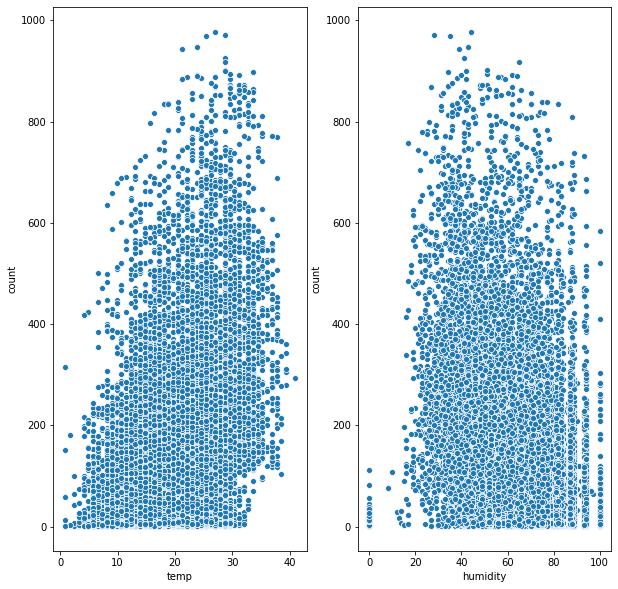

In [120]:
fig=plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
sns.scatterplot(x=train['temp'], y=train['count'])
fig.add_subplot(1,2,2)
sns.scatterplot(x=train['humidity'], y=train['count'])